In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score, f1_score, adjusted_rand_score
from xgboost import XGBClassifier

# Load training and testing datasets
train_df = pd.read_csv('/kaggle/input/features-238/audio_features_238.csv')
test_df = pd.read_csv('/kaggle/input/features-238/audio_features_238_test.csv')

# Separate features and labels
X = train_df.drop(columns=['labels'])
y = train_df['labels']

X_test_final = test_df.drop(columns=['labels'])
# Split into training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.05, random_state=42, stratify=y)
print(X_val.shape)

# Evaluate on training data


(906, 238)


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsOneClassifier

# Define the Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=250,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1,
    max_features='sqrt'
)
# can also try vairuous base models like svm, nn , mlp etc
# Create the OneVsOneClassifier with Random Forest as the base estimator
ovo_model_rf = OneVsOneClassifier(rf_model)

print("Training OvO model with Random Forest...")
ovo_model_rf.fit(X_train, y_train)
print("OvO model with Random Forest trained!")


Training OvO model with Random Forest...
OvO model with Random Forest trained!


Validation Accuracy: 0.9117
Validation Adjusted Rand Index: 0.7981


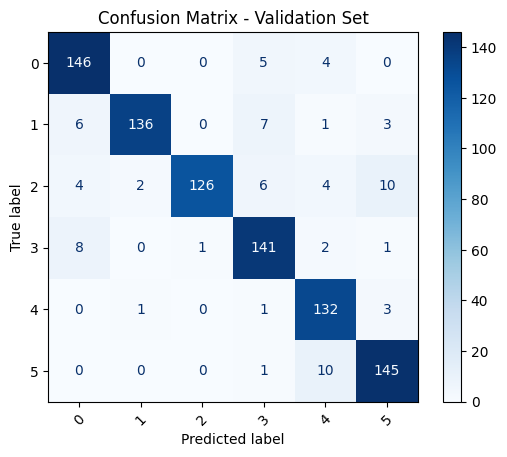

In [6]:

from sklearn.metrics import accuracy_score, adjusted_rand_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

val_preds = ovo_model_rf.predict(X_val)
val_acc = accuracy_score(y_val, val_preds)
val_ari = adjusted_rand_score(y_val, val_preds)

print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Validation Adjusted Rand Index: {val_ari:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_val, val_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix - Validation Set")
plt.show()

# # val_f1 = f1_score(y_val, val_preds, average='weighted')
# # print(f"Validation F1 Score: {val_f1:.4f}")

# print(f"Validation Accuracy: {val_acc:.4f}")
# print(f"Validation Adjusted Rand Index: {val_ari:.4f}")


In [9]:
# Predict on test data
test_preds = ovo_model_rf.predict(X_test_final)
submission = pd.DataFrame({
    'ID': test_df['labels'],
    'TARGET': test_preds
})

Submission file 'submission.csv' generated.


In [12]:
def modify(path):
    return path.split('/')[-1]

In [13]:
submission['ID'] = submission['ID'].apply(modify)
submission.to_csv('submission-ovo.csv', index=False)
print("Submission file 'submission.csv' generated.")

Submission file 'submission.csv' generated.
